In [2]:
#make a variable and put an array in it
x = [10, 20, 30, 40, 50]
for item in x:
    print "Item is ", item, ", baby!"

Item is  10 , baby!
Item is  20 , baby!
Item is  30 , baby!
Item is  40 , baby!
Item is  50 , baby!


# Libraries

In [2]:
# as creates an alias
import numpy as np         # working with arrays
import scipy as sp         # numerical algorithms
import pandas as pd        # working with tables
import matplotlib as mpl   # plotting module
import matplotlib.cm as cm # colour maps
import matplotlib.pyplot as plt
import sklearn           # machine learning
import requests          # getting data from the web
import bs4               # beautifulsoup - parse HTML and XML
import pyquery
import seaborn as sns    # sets up styles and gives us more plotting options

# pandas lets us handle data as dataframes
# set up pandas table display
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)

# Hello Wolrd

[  0.           0.34482759   0.68965517   1.03448276   1.37931034
   1.72413793   2.06896552   2.4137931    2.75862069   3.10344828
   3.44827586   3.79310345   4.13793103   4.48275862   4.82758621
   5.17241379   5.51724138   5.86206897   6.20689655   6.55172414
   6.89655172   7.24137931   7.5862069    7.93103448   8.27586207
   8.62068966   8.96551724   9.31034483   9.65517241  10.        ]


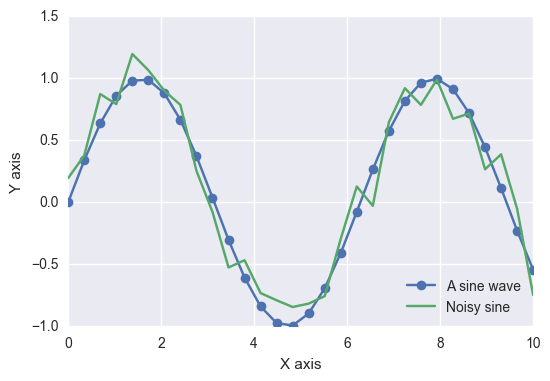

In [10]:
# The %... is an iPython thing, and is not part of the Python language.
# In this case we're just telling the plotting library to draw things on
# the notebook, instead of on a separate window.
%matplotlib inline 
#this line above prepares IPython notebook for working with matplotlib

x = np.linspace(0, 10, 30)  #array of 30 points from 0 to 10
print x
y = np.sin(x)
z = y + np.random.normal(size=30) * .2
plt.plot(x, y, 'o-', label='A sine wave')
plt.plot(x, z, '-', label='Noisy sine')
plt.legend(loc = 'lower right')
plt.xlabel("X axis")
plt.ylabel("Y axis")   

## Hello Numpy


In [22]:
x = np.random.random((3, 4))
print x

[[ 0.01829918  0.74424631  0.56234574  0.97343379]
 [ 0.45368622  0.05056914  0.43996154  0.77086401]
 [ 0.19962605  0.60253426  0.28248364  0.22479875]]


In [23]:
x = x + 1 
print x

[[ 1.01829918  1.74424631  1.56234574  1.97343379]
 [ 1.45368622  1.05056914  1.43996154  1.77086401]
 [ 1.19962605  1.60253426  1.28248364  1.22479875]]


In [25]:
print x[0,0]

1.01829918302


In [28]:
print x[0, :]
print x[0, ::2]
print x[1, :]
print x[1, ::3]
print x[1, ::1]
print x[1, ::5]


[ 1.01829918  1.74424631  1.56234574  1.97343379]
[ 1.01829918  1.56234574]
[ 1.45368622  1.05056914  1.43996154  1.77086401]
[ 1.45368622  1.77086401]
[ 1.45368622  1.05056914  1.43996154  1.77086401]
[ 1.45368622]


In [29]:
print "Mas is ", x.max()
print "Min is", x.min()
print "Mean is", x.mean()


Mas is  1.97343379485
Min is 1.01829918302
Mean is 1.44357071995


In [33]:
print x
print x.max(axis=1) # max from each row
print x.max(axis=0) # max from each column

[[ 1.01829918  1.74424631  1.56234574  1.97343379]
 [ 1.45368622  1.05056914  1.43996154  1.77086401]
 [ 1.19962605  1.60253426  1.28248364  1.22479875]]
[ 1.97343379  1.77086401  1.60253426]
[ 1.45368622  1.74424631  1.56234574  1.97343379]


## Binomial Simulation
#### Coin Toss

In [34]:
x = np.random.binomial(500, .5)
print "number of heads:", x

number of heads: 260


In [35]:
# loop
heads = []
for i in range(500):
    heads.append(np.random.binomial(500, .5))

# "list comprehension"
heads = [np.random.binomial(500, .5) for i in range(500)]

# pure numpy
heads = np.random.binomial(500, .5, size=500)

Lets Try timing these functions to see which is the most efficent way to use python

In [45]:
import time
n = 50000


t0 = time.time()
t1 = time.time()

print "time: ", time.time()
print "dtime: ", t1 - t0
print "n: ", n
print "Loop"
t0 = time.time()
# loop
heads = []
for i in range(n):
    heads.append(np.random.binomial(n, .5))

t1 = time.time() - t0
print "time was: ", t1
print

print "List"
t0 = time.time()  
# "list comprehension"
heads = [np.random.binomial(n, .5) for i in range(n)]
t1 = time.time() - t0
print "time was: ", t1
print

print "numpy"
t0 = time.time()  
# pure numpy
heads = np.random.binomial(n, .5, size=n)
t1 = time.time() - t0
print "time was: ", t1

time:  1480225123.18
dtime:  0.0
n:  50000
Loop
time was:  0.15499997139

List
time was:  0.161000013351

numpy
time was:  0.00600004196167


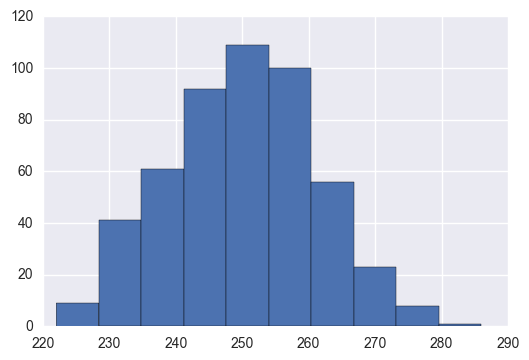

In [36]:
histogram = plt.hist(heads, bins=10)

In [37]:
heads.shape

(500L,)

# Monty Hall Problem
Generate a random array of 0s, 1s, and 2s, representing
hiding a prize between door 0, door 1, and door 2

In [3]:
def simulate_prizedoor(nsim):
    return np.random.randint(0, 3, (nsim))
print "hi", simulate_prizedoor(5)

hi [2 2 2 1 0]


Return any strategy for guessing which door a prize is behind. This
could be a random strategy, one that always guesses 2, whatever.

In [5]:
def simulate_guess(nsim):
    return np.zeros(nsim, dtype=np.int)
print simulate_guess(5)

[0 0 0 0 0]


goat_door

Simulate the opening of a "goat door" that doesn't contain the prize,
and is different from the contestants guess

In [21]:
def goat_door(prizedoors, guesses):
    #strategy: generate random answers, and
    #keep updating until they satisfy the rule
    #that they aren't a prizedoor or a guess
    result = np.random.randint(0, 3, prizedoors.size)
    while True:
        bad = (result == prizedoors) | (result == guesses)
        if not bad.any():
            return result
        result[bad] = np.random.randint(0, 3, bad.sum())

               


prizes=np.array([0, 1, 2, 0, 1, 2, 2, 2])
guesses=np.array([1, 1, 1,0,1,2,1,1])
print "Prizes:     ",prizes
print "Guesses:    ",guesses
print "Goat reveal:",goat_door(prizes, guesses)



Prizes:      [0 1 2 0 1 2 2 2]
Guesses:     [1 1 1 0 1 2 1 1]
Goat reveal: [2 2 0 1 0 0 0 0]


switch_guess

The strategy that always switches a guess after the goat door is opened

In [24]:
def switch_guess(guesses, goatdoors):
    ret = []
    l = len(guesses)
    for i in range(l):
        ret.append((guesses[i]+1)%3)
        if ret[i] == goatdoors[i]:
            ret[i] = (ret[i]+1)%3
    return np.array(ret)
print switch_guess(np.array([0, 1, 2]), np.array([1, 2, 1]))

### Using a numpy.where matching

# def switch_guess(guesses, goatdoors):
#     result = np.zeros(guesses.size)
#     switch = {(0, 1): 2, (0, 2): 1, (1, 0): 2, (1, 2): 1, (2, 0): 1, (2, 1): 0}
#     for i in [0, 1, 2]:
#         for j in [0, 1, 2]:
#             mask = (guesses == i) & (goatdoors == j)
#             if not mask.any():
#                 continue
#             result = np.where(mask, np.ones_like(result) * switch[(i, j)], result)
#     return result

[2 0 0]


,,,
Function
--------
win_percentage

Calculate the percent of times that a simulation of guesses is correct

Parameters
-----------
guesses : array
    Guesses for each simulation
prizedoors : array
    Location of prize for each simulation

Returns
--------
percentage : number between 0 and 100
    The win percentage

In [41]:
def win_percentage(guesses, prizedoors):
#     correct = (guesses == prizedoors)
#     return 100.0 * correct.sum()/correct.size
    return (guesses == prizedoors).mean() * 100
print win_percentage(np.array([0, 1, 2]), np.array([0, 0, 0]))

33.3333333333


Now, put it together. Simulate 10000 games where contestant keeps his original guess, and 10000 games where the contestant switches his door after a  goat door is revealed. Compute the percentage of time the contestant wins under either strategy. Is one strategy better than the other?

In [46]:
ngames = 10000
simulate_prizedoor
simulate_guess
goat_door
switch_guess
win_percentage

doors = simulate_prizedoor(ngames)
guess1 = simulate_guess(ngames)
reveal = goat_door(doors, guess1)
newGuess = switch_guess(reveal, guess1)
print "Win percentage no switch: ", win_percentage(guesses=guess1, prizedoors=doors)
print "win percentage with switch: ", win_percentage(newGuess, doors)


Win percentage no switch:  33.05
win percentage with switch:  66.95


One of the best ways to build intuition about why opening a Goat door affects the odds is to re-run the experiment with 100 doors and one prize. If the game show host opens 98 goat doors after you make your initial selection, would you want to keep your first pick or switch? Can you generalize your simulation code to handle the case of n doors?

In [55]:
def sim_door(nsim, ndoor):
    return np.random.randint(0, ndoor, nsim)
def sim_guess(nsim, ndoor):
    # return np.random.randint(0, ndoor, nsim)
    return np.random.randint(0, ndoor, nsim)

# pick one of the unchosen doors to NOT be revealed (the other (ndoor-2) doors are all shown to be goats)
def not_a_goat(pdoors, guesses, ndoor):
    #pick random door (for each simulation)
    #if that random door is a winner
    ret_array = pdoors.copy()
    while True:
        bad = (ret_array == guesses) 
        if not bad.any():
            return ret_array
        ret_array[bad] = np.random.randint(0, ndoor, bad.sum())
    
    


In [57]:
ngames = 10000
simulate_prizedoor
simulate_guess
goat_door
switch_guess
win_percentage

ngames = input("How many simulations to run?: ")
ndoors = input("how many doors?: ")
winning_doors = sim_door(ngames, ndoors)
original_guesses = sim_guess(ngames, ndoors)
other_possible_option = not_a_goat(winning_doors, original_guesses, ndoors)

print "Win percentage no switch: ", win_percentage(original_guesses, winning_doors)
print "win percentage with switch: ", win_percentage(other_possible_option, winning_doors)


How many simulations to run?: 5000
how many doors?: 100
Win percentage no switch:  1.08
win percentage with switch:  98.92
